In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
involvement = pd.read_csv("/work/BDPNN Member Involvement Survey (Responses - FINAL.csv")
involvement = involvement.rename(columns={'Gender ': 'Gender'})
involvement

,Timestamp,Email Address,First Name,Last Name,Gender,Race/Ethnicity,Age Range,What is your employment status?,Current or Past Experiences,Current or Past Disaster Prep Engagement (Please check all that apply),Feel free to elaborate on your previous response.,How did you hear about us?,Do you know which emergency zone you're located in or have you used ZoneHaven?,Do you have an up-to-date emergency kit?,Would you be interested in participating directly with BDPNN?,Would you be interested in any of the following volunteer options?,Any other Questions / Comments / Concerns / Suggestions?,What zone are you in?,Are you in an organized neighborhood group?,Confidentiality
0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Employed (Full-time),NaN,NaN,NaN,Word-of-Mouth,Yes,Yes,Yes,Not sure,Thank you DataGood,NaN,NaN,NaN
1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,Attend a meeting,NaN,BER-E010,Yes,NaN
2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,Part of mailing lists & receiving information ...,NaN,No idea!,No,No,No,Would like to find out when you provide help t...,NaN,Unknown,No,NaN
3,4/17/2023 15:54:00,bcfilms@me.com,Thomas,Hermann,Male,Caucasian,65+,Retired,None,Part of mailing lists & receiving information ...,Attended BPDNN meetings,Attended an event,No,Yes,No,Attend a meeting,CURRENTLY WORKING ON REVITALIZING OUR NEIGHBOR...,UNKNOWN,Yes,NaN
4,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,Caucasian,65+,Retired,Public health,Part of mailing lists & receiving information ...,"I have retired from leading our group, the All...","Attended an event, Word-of-Mouth",Yes,Yes,No,No thank you,NaN,BER-E046,"Was organized, but now less active",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Social Media",Yes,Yes,No,No thank you,NaN,BER-E011,No,NaN
134,4/29/2023 6:16:33,kate.w.wilson@gmail.co,Kate,Wilson,Female,White,40 to 64,Employed (Part-time),Doctor/Nurse,Part of mailing lists & receiving information ...,I'm a nurse who does not do clinical work any-...,Word-of-Mouth,No,No,Yes,Attend a meeting,NaN,BER-E061,No,NaN
135,4/29/2023 11:35:40,njminor@comcast.net,Norma,Minor,NaN,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Website",Yes,No,No,No thank you,NaN,26,Yes,NaN
136,4/30/2023 9:16:56,msargent@lmi.net,Maryann,Sargent,Female,White,40 to 64,Employed (Full-time),NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,No thank you,My cup runneth over! I follow your emails and ...,BER-E064,Yes,NaN


In [5]:
#rename all columns to shorter, more condensed names for improved database readability
involvement = involvement.rename(
    columns={'Race/Ethnicity': 'Race', 
    'What is your employment status?':'Employment', 
    'Current or Past Experiences':'Experience', 
    'Current or Past Disaster Prep Engagement (Please check all that apply)':'Engagement',
    'Feel free to elaborate on your previous response.': 'Involvement Notes',
    "Do you know which emergency zone you're located in or have you used ZoneHaven?":'Know Zone',
    'Do you have an up-to-date emergency kit?':'Emergency Kit',
    'Would you be interested in participating directly with BDPNN?':'Future Participation',
    'Would you be interested in any of the following volunteer options?':'Volunteering',
    'Any other Questions / Comments / Concerns / Suggestions?':'Comments',
    'What zone are you in?': 'Zone',
    'Are you in an organized neighborhood group?':'Organized',
    'How did you hear about us?':'Outreach'
    })

In [6]:
# clean Race/Ethnicity column
involvement['Race'] = involvement['Race'].str.upper()
involvement['Race'] = involvement['Race'].str.replace('IRISH', 'WHITE')
involvement['Race'] = involvement['Race'].str.replace('CAUCASIAN', 'WHITE')
involvement['Race'] = involvement['Race'].str.replace('WHITE/EUROPEAN', 'WHITE')
involvement['Race'] = involvement['Race'].str.capitalize()
involvement.head()

,Timestamp,Email Address,First Name,Last Name,Gender,Race,Age Range,Employment,Experience,Engagement,Involvement Notes,Outreach,Know Zone,Emergency Kit,Future Participation,Volunteering,Comments,Zone,Organized,Confidentiality
0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Employed (Full-time),NaN,NaN,NaN,Word-of-Mouth,Yes,Yes,Yes,Not sure,Thank you DataGood,NaN,NaN,NaN
1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,Attend a meeting,NaN,BER-E010,Yes,NaN
2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,Part of mailing lists & receiving information ...,NaN,No idea!,No,No,No,Would like to find out when you provide help t...,NaN,Unknown,No,NaN
3,4/17/2023 15:54:00,bcfilms@me.com,Thomas,Hermann,Male,White,65+,Retired,None,Part of mailing lists & receiving information ...,Attended BPDNN meetings,Attended an event,No,Yes,No,Attend a meeting,CURRENTLY WORKING ON REVITALIZING OUR NEIGHBOR...,UNKNOWN,Yes,NaN
4,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,White,65+,Retired,Public health,Part of mailing lists & receiving information ...,"I have retired from leading our group, the All...","Attended an event, Word-of-Mouth",Yes,Yes,No,No thank you,NaN,BER-E046,"Was organized, but now less active",NaN


In [34]:
# clean gender column
involvement['Gender'] = involvement['Gender'].str.replace(r'^[fF][a-zA-Z]* | Female ', 'Female', regex=True)
involvement['Gender'] = involvement['Gender'].str.replace(r'^[mM][a-zA-Z]* | Male(very)', 'Male', regex=True)
involvement

,Timestamp,Email Address,First Name,Last Name,Gender,Race,Age Range,Employment,Experience,Engagement,Involvement Notes,Outreach,Know Zone,Emergency Kit,Future Participation,Volunteering,Comments,Zone,Organized,Confidentiality
0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Full-time,NaN,NaN,NaN,Word-of-Mouth,Yes,Yes,Yes,Not sure,Thank you DataGood,NaN,NaN,NaN
1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,Attend a meeting,NaN,BER-E010,Yes,NaN
2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,Part of mailing lists & receiving information ...,NaN,No idea!,No,No,No,Would like to find out when you provide help t...,NaN,Unknown,No,NaN
3,4/17/2023 15:54:00,bcfilms@me.com,Thomas,Hermann,Male,White,65+,Retired,None,Part of mailing lists & receiving information ...,Attended BPDNN meetings,Attended an event,No,Yes,No,Attend a meeting,CURRENTLY WORKING ON REVITALIZING OUR NEIGHBOR...,UNKNOWN,Yes,NaN
4,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,White,65+,Retired,Public health,Part of mailing lists & receiving information ...,"I have retired from leading our group, the All...","Attended an event, Word-of-Mouth",Yes,Yes,No,No thank you,NaN,BER-E046,"Was organized, but now less active",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Social Media",Yes,Yes,No,No thank you,NaN,BER-E011,No,NaN
134,4/29/2023 6:16:33,kate.w.wilson@gmail.co,Kate,Wilson,Female,White,40 to 64,Part-time,Doctor/Nurse,Part of mailing lists & receiving information ...,I'm a nurse who does not do clinical work any-...,Word-of-Mouth,No,No,Yes,Attend a meeting,NaN,BER-E061,No,NaN
135,4/29/2023 11:35:40,njminor@comcast.net,Norma,Minor,NaN,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Website",Yes,No,No,No thank you,NaN,26,Yes,NaN
136,4/30/2023 9:16:56,msargent@lmi.net,Maryann,Sargent,Female,White,40 to 64,Full-time,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,No thank you,My cup runneth over! I follow your emails and ...,BER-E064,Yes,NaN


In [35]:
# clean gender column
involvement['Employment'] = involvement['Employment'].replace({'Employed (Full-time)':'Full-time', 'Employed (Part-time)':'Part-time'})
involvement

,Timestamp,Email Address,First Name,Last Name,Gender,Race,Age Range,Employment,Experience,Engagement,Involvement Notes,Outreach,Know Zone,Emergency Kit,Future Participation,Volunteering,Comments,Zone,Organized,Confidentiality
0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Full-time,NaN,NaN,NaN,Word-of-Mouth,Yes,Yes,Yes,Not sure,Thank you DataGood,NaN,NaN,NaN
1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,Attend a meeting,NaN,BER-E010,Yes,NaN
2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,Part of mailing lists & receiving information ...,NaN,No idea!,No,No,No,Would like to find out when you provide help t...,NaN,Unknown,No,NaN
3,4/17/2023 15:54:00,bcfilms@me.com,Thomas,Hermann,Male,White,65+,Retired,None,Part of mailing lists & receiving information ...,Attended BPDNN meetings,Attended an event,No,Yes,No,Attend a meeting,CURRENTLY WORKING ON REVITALIZING OUR NEIGHBOR...,UNKNOWN,Yes,NaN
4,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,White,65+,Retired,Public health,Part of mailing lists & receiving information ...,"I have retired from leading our group, the All...","Attended an event, Word-of-Mouth",Yes,Yes,No,No thank you,NaN,BER-E046,"Was organized, but now less active",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Social Media",Yes,Yes,No,No thank you,NaN,BER-E011,No,NaN
134,4/29/2023 6:16:33,kate.w.wilson@gmail.co,Kate,Wilson,Female,White,40 to 64,Part-time,Doctor/Nurse,Part of mailing lists & receiving information ...,I'm a nurse who does not do clinical work any-...,Word-of-Mouth,No,No,Yes,Attend a meeting,NaN,BER-E061,No,NaN
135,4/29/2023 11:35:40,njminor@comcast.net,Norma,Minor,NaN,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Website",Yes,No,No,No thank you,NaN,26,Yes,NaN
136,4/30/2023 9:16:56,msargent@lmi.net,Maryann,Sargent,Female,White,40 to 64,Full-time,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,No thank you,My cup runneth over! I follow your emails and ...,BER-E064,Yes,NaN


In [9]:
involvement_nu = involvement[['Gender']].dropna()
involvement_nu

,Gender
3,Male
4,Female
5,Male
6,Male
7,Male
...,...
132,Female
133,Female
134,Female
136,Female


In [67]:
involvement_groupbyed = involvement.groupby('Experience').count().\
sort_values(by=['Timestamp'], ascending=False)
involvement_groupbyed = involvement_groupbyed[involvement_groupbyed['Timestamp'] > 1][['Timestamp']]\
.reset_index().rename(columns={"Timestamp": "Count"})
involvement_groupbyed

,Experience,Count
0,Doctor/Nurse,7
1,CERT,2
2,None,2
3,EMT,2


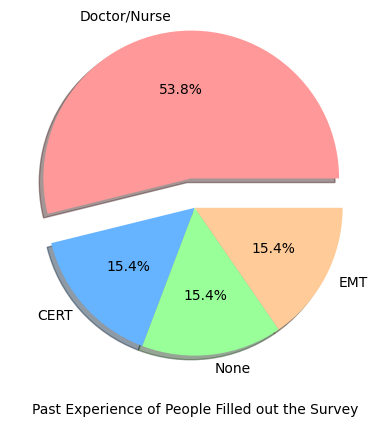

In [79]:
myexplode = [0.2, 0, 0, 0]
mylabels = involvement_groupbyed['Experience']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(involvement_groupbyed['Count'], labels = mylabels, explode = myexplode, \
colors=colors, autopct='%1.1f%%', shadow = True)
plt.xlabel('Past Experience of People Filled out the Survey')
plt.show() 

In [10]:
DeepnoteChart(involvement_nu, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Gender","scale":{"type":"linear"},"stack":"zero"},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Gender","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

nan
nan
nan
Male
Female
Male
Male
Male
Male
Female
Male
Female
Female
Male
Female
Female
Female
Male
nan
Male
Female
Male
Male
Male
Male
Female
Male
Female
Female
Female
Female
Female
nan
Female
Female
Female
Female
Female
nan
Female
Female
Female
nan
Female
Male
Male
Non-binary 
Male
nan
Male
Female
nan
nan
Male
nan
nan
Female
Female
Female
Male
Male
Female
Male
nan
nan
Male(very)
Male
Female
Female
Female
Male
Female
Male
Female
Male
nan
Female
Female
Female
nan
Female
Female
nan
Male
Female
nan
Female
Female
nan
Female
Female
Female
Female
Female
Male
Male
Male
Female
Female
Female
Female
Female
Female
Female
Female
nan
nan
Female
Female
Male
nan
Female
nan
nan
Female
Male
nan
Female
Female
Male
Female
nan
nan
nan
Male
Male
Female
Female
Male
Female
Male
Female
Female
Female
Female
nan
Female
Female


<AxesSubplot:xlabel='Gender', ylabel='Count'>

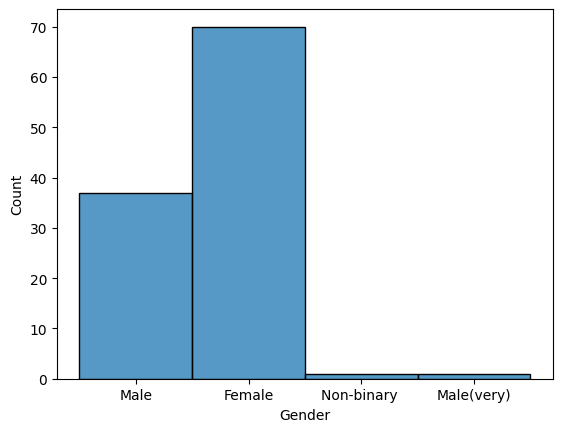

In [11]:
for i in involvement['Gender']: 
    print(i)
sns.histplot(data = involvement, x = 'Gender')

In [12]:
involvement_by_age = involvement.groupby('Age Range').agg('count').reset_index()
involvement_by_age = involvement_by_age[['Age Range', 'Timestamp']].rename(columns={'Timestamp':'Count'})
total = involvement_by_age['Count'].sum()
involvement_by_age['Percentage'] = (involvement_by_age['Count'] / total * 100).round(1)
involvement_by_age

,Age Range,Count,Percentage
0,25 to 39,1,0.7
1,40 to 64,40,29.4
2,65+,95,69.9


Text(0.5, 1.0, 'Age Range')

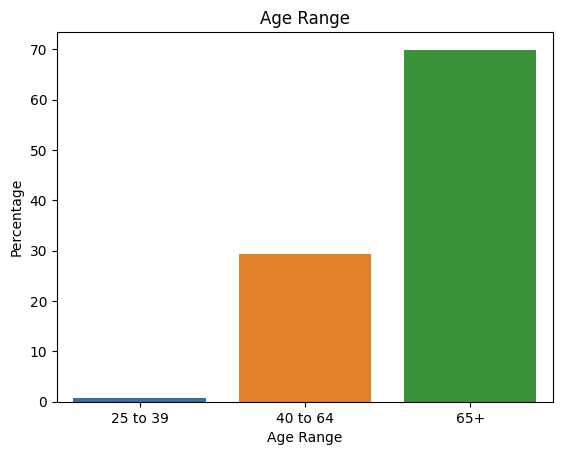

In [13]:
sns.barplot(data=involvement_by_age, x='Age Range', y='Percentage')
plt.title('Age Range')

This gives insights into the distribution of ages, where we notice that over 60% of the responses have people over 65 years old.

In [14]:
involvement_employment_status = involvement.groupby('Employment').agg('count').reset_index()#.drop('')
involvement_employment_status = involvement_employment_status [['Employment', 'Timestamp']].rename(columns={'Timestamp':'Count'})
total = involvement_employment_status['Count'].sum()
involvement_employment_status['Percentage'] = (involvement_employment_status['Count'] / total * 100).round(1)
involvement_employment_status

,Employment,Count,Percentage
0,Consultant,1,0.7
1,Disabled,1,0.7
2,Full-time,26,18.8
3,"I still work very, very part-time",1,0.7
4,Part-time,17,12.3
5,Prefer not to answer demographic questions (ag...,1,0.7
6,Retired,85,61.6
7,Self employed,1,0.7
8,Self-employed,2,1.4
9,Semi retired,1,0.7


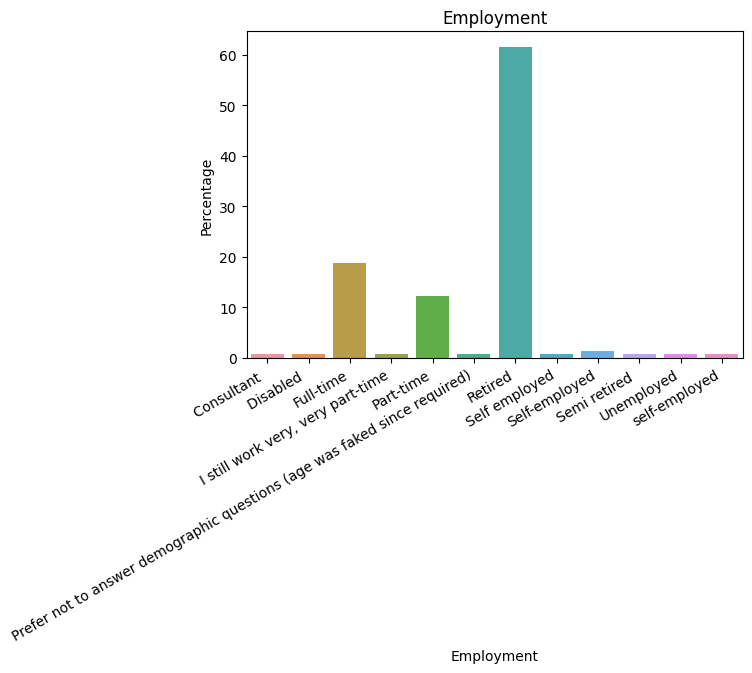

In [15]:
involvement_employment_status
sns.barplot(data=involvement_employment_status, x='Employment', y='Percentage')
plt.title('Employment')
plt.gcf().autofmt_xdate()

### Involvement Analysis 

In [16]:
##future_involvement = involvement['']

In [17]:
#sns.histplot(data=involvement, x = 'Would you be interested in participating directly with BDPNN?', hue = 'Do you have an up-to-date emergency kit?')
##plt.title('Do you have an up-to-date emergency kit?')
###plt.gcf().autofmt_xdate()

In [18]:
#sns.histplot(data=involvement, x = 'Volunteer')
##plt.title('Would you be interested in any of the following volunteer options?')
###plt.xlabel("Would you be interested in any of the following volunteer options?", labelpad=7)
####plt.gcf().autofmt_xdate()

In [19]:
#####involvement_employment_status = involvement.groupby('What is your employment status?').agg('count').reset_index()#.drop('')
####involvement_employment_status = involvement_employment_status [['What is your employment status?', 'Timestamp']].rename(columns={'Timestamp':'Count'})
###total = involvement_employment_status['Count'].sum()
##involvement_employment_status['Percentage'] = (involvement_employment_status['Count'] / total * 100).round(1)
#involvement_employment_status

In [20]:
#involvement_employment_status
#sns.barplot(data=involvement_employment_status, x='What is your employment status?', y='Percentage')
#plt.gcf().autofmt_xdate()

## Merge form responses with Dataframe

In [21]:
import pandas as pd

In [22]:
# inputting the census tract merged
contacts = pd.read_csv('/work/contacts-census-tracts-merged.csv')
contacts = contacts.rename(columns={'ContactEmail1-Master': 'Email Address'})
#contacts[['Last Name', 'First Name']] = contacts['ContactName'].str.split(r',\s*', expand=True)
contacts['Last Name'] = contacts['ContactName'].str.extract(r'^([^,-]+(?:-[^,-]+)?),')
contacts['First Name'] = contacts['ContactName'].str.extract(r',\s*([^,-]+)')
contacts

,index,ContactID,GroupID,ContactName,ContactRole,ContactAddress,Contact cross streets,ContactZip,ContactCity,ContactPhone1,...,DiscGrp Io,Date,Final Address,Latitude,Longitude,geometry,spa_names,Year,Last Name,First Name
0,990,4,N78,"Trippe, Tom",Captain,1551 La Vereda Rd,NaN,94708.0,Berkeley,510-529-5721,...,yes,2008-07-08,"1551 La Vereda Rd, Berkeley, CA",37.880628,-122.257736,POINT (-122.25773560759333 37.88062805),4216.0,2008,Trippe,Tom
1,533,9,M35,"King, Allen",Co-Captain,919 Mendocino Ave,NaN,94707.0,Berkeley,510-527-3307,...,yes,2008-07-09,"919 Mendocino Ave, Berkeley, CA",37.891339,-122.274430,POINT (-122.27443026965985 37.89133905),4212.0,2008,King,Allen
2,740,29,C17,"Nolan, Charlotte",Co-Coordinator,1638 Capistrano Ave,Ensenada/Peralta,94707.0,Berkeley,510-528-1843,...,no,2008-07-09,"1638 Capistrano Ave, Berkeley, CA",37.892011,-122.284039,POINT (-122.2840389331699 37.8920106),4213.0,2008,Nolan,Charlotte
3,769,30,C17,"Peattie, Dave",Co-Coordinator,1618 Capistrano Ave,Ensenada/Peralta,94707.0,Berkeley,510-524-4256,...,yes,2008-07-09,"1618 Capistrano Ave, Berkeley, CA",37.891827,-122.284345,POINT (-122.28434499821597 37.89182655),4213.0,2008,Peattie,Dave
4,373,21,V58,"Goldstein, Karl L.",Co-Captain,1376 Virginia St,NaN,94702.0,Berkeley,NaN,...,no,2008-07-09,"1376 Virginia St, Berkeley, CA",37.874343,-122.285254,POINT (-122.2852537007657 37.874343),4222.0,2008,Goldstein,Karl L.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,897,1604,N53,"Skousen, Annis",NaN,562 Neilson Street,Thousand Oaks,94707.0,Berkeley,510,...,no,2021-08-12,"562 Neilson Street, Berkeley, CA",37.897184,-122.286572,POINT (-122.28657210525242 37.8971837),4213.0,2021,Skousen,Annis
497,845,1603,E86,"Ruiz-Healy, Catalina",NaN,1188 Arch Street,Eunice,94708.0,Berkeley,510,...,no,2021-08-12,"1188 Arch Street, Berkeley, CA",37.886665,-122.265732,POINT (-122.26573180421408 37.88666515),4215.0,2021,Ruiz-Healy,Catalina
498,95,1597,ZZ9-Fire 1,"Bond, Ethel",NaN,2123 Fifth Street,University,94710.0,Berkeley,510,...,no,2021-06-29,"2123 Fifth Street, Berkeley, CA",37.865675,-122.297909,POINT (-122.29790853771277 37.86567495),4220.0,2021,Bond,Ethel
499,674,1584,ZZ9-Kens,"McCoubrey, Annette",NaN,631 Parkside Court,Wildcat Canyon/Canon,94708.0,Kensington,510,...,no,2021-03-07,"631 Parkside Court, Kensington, CA",37.904686,-122.268867,POINT (-122.26886747830576 37.90468578587657),NaN,2021,McCoubrey,Annette


In [23]:
members_by_census_tract = contacts.groupby(by="spa_names").agg('count')
members_by_census_tract

,index,ContactID,GroupID,ContactName,ContactRole,ContactAddress,Contact cross streets,ContactZip,ContactCity,ContactPhone1,...,Source,DiscGrp Io,Date,Final Address,Latitude,Longitude,geometry,Year,Last Name,First Name
spa_names,,,,,,,,,,,,,,,,,,,,,
4211.00,21,21,21,21,1,21,15,20,21,18,...,21,21,21,21,21,21,21,21,20,20
4212.00,49,49,49,49,9,49,26,42,49,45,...,49,49,49,49,49,49,49,49,49,49
4213.00,57,57,57,57,12,57,39,52,57,45,...,57,57,57,57,57,57,57,57,57,57
4214.00,16,16,16,16,5,16,8,12,16,14,...,16,16,16,16,16,16,16,16,16,16
4215.00,32,32,32,32,2,32,19,26,32,31,...,32,32,32,32,32,32,32,32,31,31
4216.00,29,29,29,29,6,29,16,22,29,28,...,29,29,29,29,29,29,29,29,27,27
4217.00,12,12,12,12,0,12,8,9,12,11,...,12,12,12,12,12,12,12,12,12,12
4218.00,27,27,27,27,4,27,17,20,27,26,...,27,27,27,27,27,27,27,27,27,27
4219.00,30,30,30,30,2,30,20,25,30,30,...,30,30,30,30,30,30,30,30,30,30


In [24]:
involvement

,Timestamp,Email Address,First Name,Last Name,Gender,Race,Age Range,Employment,Experience,Engagement,Involvement Notes,Outreach,Know Zone,Emergency Kit,Future Participation,Volunteering,Comments,Zone,Organized,Confidentiality
0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Full-time,NaN,NaN,NaN,Word-of-Mouth,Yes,Yes,Yes,Not sure,Thank you DataGood,NaN,NaN,NaN
1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,Attend a meeting,NaN,BER-E010,Yes,NaN
2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,Part of mailing lists & receiving information ...,NaN,No idea!,No,No,No,Would like to find out when you provide help t...,NaN,Unknown,No,NaN
3,4/17/2023 15:54:00,bcfilms@me.com,Thomas,Hermann,Male,White,65+,Retired,None,Part of mailing lists & receiving information ...,Attended BPDNN meetings,Attended an event,No,Yes,No,Attend a meeting,CURRENTLY WORKING ON REVITALIZING OUR NEIGHBOR...,UNKNOWN,Yes,NaN
4,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,White,65+,Retired,Public health,Part of mailing lists & receiving information ...,"I have retired from leading our group, the All...","Attended an event, Word-of-Mouth",Yes,Yes,No,No thank you,NaN,BER-E046,"Was organized, but now less active",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Social Media",Yes,Yes,No,No thank you,NaN,BER-E011,No,NaN
134,4/29/2023 6:16:33,kate.w.wilson@gmail.co,Kate,Wilson,Female,White,40 to 64,Part-time,Doctor/Nurse,Part of mailing lists & receiving information ...,I'm a nurse who does not do clinical work any-...,Word-of-Mouth,No,No,Yes,Attend a meeting,NaN,BER-E061,No,NaN
135,4/29/2023 11:35:40,njminor@comcast.net,Norma,Minor,NaN,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,NaN,"Attended an event, Website",Yes,No,No,No thank you,NaN,26,Yes,NaN
136,4/30/2023 9:16:56,msargent@lmi.net,Maryann,Sargent,Female,White,40 to 64,Full-time,NaN,Part of mailing lists & receiving information ...,NaN,Word-of-Mouth,Yes,Yes,No,No thank you,My cup runneth over! I follow your emails and ...,BER-E064,Yes,NaN


In [43]:
survey_involvement_combined = pd.merge(involvement, contacts, on='Last Name')
survey_involvement_combined

,Timestamp,Email Address_x,First Name_x,Last Name,Gender,Race,Age Range,Employment,Experience,Engagement,...,Source,DiscGrp Io,Date,Final Address,Latitude,Longitude,geometry,spa_names,Year,First Name_y
0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Full-time,NaN,NaN,...,Orig CN list,yes,2008-07-09,"1618 Capistrano Ave, Berkeley, CA",37.891827,-122.284345,POINT (-122.28434499821597 37.89182655),4213.00,2008,Dave
1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,Part of mailing lists & receiving information ...,...,Website 8-31-21,yes,2021-09-01,"900 Indian Rock Ave, Berkeley, CA",37.893691,-122.272136,POINT (-122.27213624722222 37.8936911),4212.00,2021,Mary Beth
2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,Part of mailing lists & receiving information ...,...,Email 1-29-20,yes,2020-02-01,"2233 Curtis, Berkeley, CA",37.865592,-122.288536,POINT (-122.28853554349948 37.8655919),4231.00,2020,Susan
3,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,White,65+,Retired,Public health,Part of mailing lists & receiving information ...,...,Pam Grossman,yes,2014-07-17,"1208 Allston Way, Berkeley, CA",37.866579,-122.288523,POINT (-122.28852255 37.866579),4231.00,2014,Linda
4,4/17/2023 16:40:05,joe@joekewe.com,Joe,Cordes,Male,NaN,40 to 64,Full-time,NaN,Part of mailing lists & receiving information ...,...,Meeting 3-10-11,yes,2010-03-31,"965 Tulare Ave, Berkeley, CA",37.888146,-122.281413,POINT (-122.28141263486985 37.8881455),4213.00,2010,Joe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Meeting 11-30-17,no,2017-12-07,"548 Vincente, Berkeley, CA",37.898378,-122.284423,POINT (-122.28442283265025 37.89837795),4213.00,2017,Holly
97,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Mike Hoey-Natl Night Out,no,2019-08-13,"1808 Bancroft Way, Berkeley, CA",37.866576,-122.274275,POINT (-122.27427504765276 37.866575999999995),4230.00,2019,Erica Meta
98,4/29/2023 11:35:40,njminor@comcast.net,Norma,Minor,NaN,NaN,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Orig CN list,yes,2008-07-09,"1409 Holly St, Berkeley, CA",37.878924,-122.281544,POINT (-122.28154427688557 37.8789242),4218.00,2008,Jeanie
99,4/30/2023 9:16:56,msargent@lmi.net,Maryann,Sargent,Female,White,40 to 64,Full-time,NaN,Part of mailing lists & receiving information ...,...,Website 1-21-19;Comm Fair 10-12-19,yes,2019-01-22,"2905 Deakin Street, Berkeley, CA",37.857000,-122.262327,POINT (-122.26232680286668 37.85699965),4236.01,2019,Maryann


In [44]:
# Find potential duplicates
survey_involvement_combined[survey_involvement_combined['Last Name'].duplicated()]

,Timestamp,Email Address_x,First Name_x,Last Name,Gender,Race,Age Range,Employment,Experience,Engagement,...,Source,DiscGrp Io,Date,Final Address,Latitude,Longitude,geometry,spa_names,Year,First Name_y
13,4/18/2023 17:52:33,michellewilliams3@berkeley.edu,Michelle,Williams,Female,Berkeley,40 to 64,Part-time,CERT,Part of mailing lists & receiving information ...,...,from Linden block leader,no,2017-09-16,"Linden Ave, Berkeley, CA",37.857706,-122.249768,POINT (-122.2497682 37.8577055),4238.0,2017,Zoe
14,4/18/2023 17:52:33,michellewilliams3@berkeley.edu,Michelle,Williams,Female,Berkeley,40 to 64,Part-time,CERT,Part of mailing lists & receiving information ...,...,Pam Grossman,no,2018-01-29,"466 Kentucky Ave, Berkeley, CA",37.902048,-122.272207,POINT (-122.27220696941797 37.9020479),4212.0,2018,Rebecca
23,4/18/2023 20:31:12,neliawhite@gmail.com,Nelia,White,Female,White,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Email Dave Peattie,yes,2016-08-29,"2107 Sacramento St, Berkeley, CA",37.869163,-122.281530,POINT (-122.28152986964287 37.86916295),4230.0,2016,Daphne
24,4/18/2023 20:31:12,neliawhite@gmail.com,Nelia,White,Female,White,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Community Fair 10-20-18,no,2018-10-30,"1846 Russell St, Berkeley, CA",37.855928,-122.271776,POINT (-122.27177607302632 37.855927949999995),4234.0,2018,Lauren/Alex
25,4/18/2023 20:31:12,neliawhite@gmail.com,Nelia,White,Female,White,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Website 10-19-19,yes,2019-10-26,"2014 Parker St, Berkeley, CA",37.861720,-122.268853,POINT (-122.26885328784327 37.86172035),4235.0,2019,Tom
26,4/18/2023 20:31:12,neliawhite@gmail.com,Nelia,White,Female,White,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Meeting 1-30-20,no,2020-02-15,"2216 Spaulding, Berkeley, CA",37.867169,-122.280931,POINT (-122.28093080118174 37.86716935),4230.0,2020,Pam
27,4/18/2023 20:31:12,neliawhite@gmail.com,Nelia,White,Female,White,65+,Retired,NaN,Part of mailing lists & receiving information ...,...,Meeting 1-30-20,no,2020-02-15,"1701 Berkeley Way, Berkeley, CA",37.872060,-122.277465,POINT (-122.27746455 37.87205955),4223.0,2020,Nelia
28,4/28/2023 0:42:44,PJW9000@aol.com,Pamela,White,NaN,"Berkeley, ca",65+,Retired,NaN,Attended meetings and/or workshops,...,Meeting 1-09,no,2009-02-01,"2327 Fifth St, Berkeley, CA",37.862392,-122.296857,POINT (-122.29685747308585 37.862392),4220.0,2009,Mary B
29,4/28/2023 0:42:44,PJW9000@aol.com,Pamela,White,NaN,"Berkeley, ca",65+,Retired,NaN,Attended meetings and/or workshops,...,Email Dave Peattie,yes,2016-08-29,"2107 Sacramento St, Berkeley, CA",37.869163,-122.281530,POINT (-122.28152986964287 37.86916295),4230.0,2016,Daphne
30,4/28/2023 0:42:44,PJW9000@aol.com,Pamela,White,NaN,"Berkeley, ca",65+,Retired,NaN,Attended meetings and/or workshops,...,Community Fair 10-20-18,no,2018-10-30,"1846 Russell St, Berkeley, CA",37.855928,-122.271776,POINT (-122.27177607302632 37.855927949999995),4234.0,2018,Lauren/Alex


In [32]:
survey_involvement_combined.to_csv('contacts_master.csv')

In [33]:
survey_involvement_by_census_tract = survey_involvement_combined.groupby(by="spa_names").agg({})
survey_involvement_by_census_tract

# get count of retired / total number of rows by census tract
# get count of people willing be involved
# percentage by race


ValueError: No objects to concatenate

In [37]:
contacts.to_csv('contacts_temp.csv')

In [38]:
survey_involvement_combined.to_csv('involvement_combined_duplicate.csv')

### Visualization based on the cleaned combined survey data

In [45]:
involvement_combined_cleaned = pd.read_csv('/work/Final Responses Combined.csv')
involvement_combined_cleaned

,Unnamed: 0,Timestamp,Email Address_x,First Name_x,Last Name,Gender,Race,Age Range,Employment,Experience,...,Source,DiscGrp Io,Date,Final Address,Latitude,Longitude,geometry,spa_names,Year,First Name_y
0,0,3/15/2023 20:09:31,davepeattie@gmail.com,David,Peattie,NaN,NaN,NaN,Full-time,NaN,...,Orig CN list,yes,2008-07-09,"1618 Capistrano Ave, Berkeley, CA",37.891827,-122.284345,POINT (-122.28434499821597 37.89182655),4213.00,2008,Dave
1,1,4/17/2023 15:52:55,mbrayz@gmail.com,Mary Beth,Ray,NaN,NaN,40 to 64,Self-employed,NaN,...,Website 8-31-21,yes,2021-09-01,"900 Indian Rock Ave, Berkeley, CA",37.893691,-122.272136,POINT (-122.27213624722222 37.8936911),4212.00,2021,Mary Beth
2,2,4/17/2023 15:53:58,ssffpp2@gmail.com,Susan,Payne,NaN,NaN,NaN,Prefer not to answer demographic questions (ag...,NaN,...,Email 1-29-20,yes,2020-02-01,"2233 Curtis, Berkeley, CA",37.865592,-122.288535,POINT (-122.28853554349948 37.8655919),4231.00,2020,Susan
3,3,4/17/2023 16:09:01,lgworthman@gmail.com,Linda,Worthman,Female,White,65+,Retired,Public health,...,Pam Grossman,yes,2014-07-17,"1208 Allston Way, Berkeley, CA",37.866579,-122.288523,POINT (-122.28852255 37.866579),4231.00,2014,Linda
4,4,4/17/2023 16:40:05,joe@joekewe.com,Joe,Cordes,Male,NaN,40 to 64,Full-time,NaN,...,Meeting 3-10-11,yes,2010-03-31,"965 Tulare Ave, Berkeley, CA",37.888146,-122.281413,POINT (-122.28141263486985 37.8881455),4213.00,2010,Joe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,94,4/28/2023 16:36:23,ruthtobey@gmail.com,Ruth,Tobey,Female,White,65+,Retired,NaN,...,Meeting 11-30-17,no,2017-12-05,"1228 Peralta Ave, Berkeley, CA",37.881650,-122.287794,POINT (-122.28779345251837 37.881650449999995),4219.00,2017,Ruth
70,96,4/28/2023 22:12:11,hsmith@philosophy.rutgers.edu,Holly,Smith,Female,NaN,65+,Retired,NaN,...,Meeting 11-30-17,no,2017-12-07,"548 Vincente, Berkeley, CA",37.898378,-122.284423,POINT (-122.28442283265025 37.89837795),4213.00,2017,Holly
71,98,4/29/2023 11:35:40,njminor@comcast.net,Norma,Minor,NaN,NaN,65+,Retired,NaN,...,Orig CN list,yes,2008-07-09,"1409 Holly St, Berkeley, CA",37.878924,-122.281544,POINT (-122.28154427688557 37.8789242),4218.00,2008,Jeanie
72,99,4/30/2023 9:16:56,msargent@lmi.net,Maryann,Sargent,Female,White,40 to 64,Full-time,NaN,...,Website 1-21-19;Comm Fair 10-12-19,yes,2019-01-22,"2905 Deakin Street, Berkeley, CA",37.857000,-122.262327,POINT (-122.26232680286668 37.85699965),4236.01,2019,Maryann


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d83108-b185-4ed2-99cc-42d1c327f6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>